# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

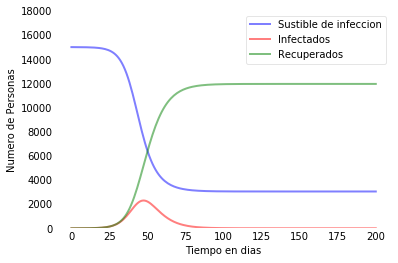

In [10]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Ro = beta/gamma
#print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
%matplotlib inline

df = pd.read_csv('covid_ec.csv', sep=',')
df
FMT = '%d/%m/%Y'
date = df['fecha']
df['fecha'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("31/12/2019", FMT)).days)
df = df.loc[:,['nombre_canton','fecha','casos_confirmados','Alta hospitalaria']]
df



,nombre_canton,fecha,casos_confirmados,Alta hospitalaria
0,guayaquil,73,7,NaN
1,babahoyo,73,11,NaN
2,quito,73,4,NaN
3,lago agrio,73,1,NaN
4,cuenca,74,1,NaN
...,...,...,...,...
2982,yantzaza,105,1,696.0
2983,Zamora,105,3,696.0
2984,san cristobal,105,7,696.0
2985,isabela,105,1,696.0


(array([ 0.02238588, -0.07267386,  4.72561595]), array([[ 6.05077185e-02,  2.45588025e-02, -7.32915529e+00],
       [ 2.45588025e-02,  9.97618813e-03, -2.95486487e+00],
       [-7.32915529e+00, -2.95486487e+00,  9.48931243e+02]]))
Casos: 27632.99800270358


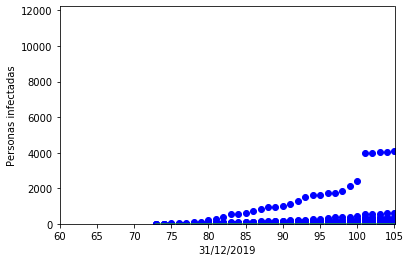

In [2]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador
# 1. Implementar solo teniendo en cuenta los casos confirmados
x = list(df.iloc [:, 1]) # Fecha 
y = list(df.iloc [:, 2]) # Numero de casos 
z = list(df.iloc [:, 3]) # Recuperados
def  exponencial ( x ,  a ,  b ,  c ): 
    return a * np . exp ( - b * x ) + c
exp_fit = curve_fit ( exponencial ,  x ,  y ,  p0 = ( 1 ,  1e-6 ,  1 ))
print(exp_fit)
pred_x = list(range(min(x),max(x)+100))
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.plot(pred_x, [exponencial(i,exp_fit[1][1],exp_fit[1][2],c= ( 2 ,  1e-6 ,  2 )) for i in pred_x], label="Modelo Exponencial" )
plt.xlabel("31/12/2019")
plt.ylabel("Personas infectadas")
plt.xlim(60, max(x)*1)
plt.ylim(0, max(y)*3)
casos=pred_x, [exponencial(i,exp_fit[0][0],exp_fit[0][1],c= ( 1 ,  1e-6 ,  1 )) for i in pred_x]
print('Casos:',casos[1][120][0])
plt.show()

# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.


In [3]:
data=list(df.iloc[:,2])                                                             
poblacion=30000
i0=27632
r0=0
s0=poblacion - i0 - r0
        
def loss(point, data):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

optimal = minimize(loss,[0.001, 0.001],args=(data),method='L-BFGS-B',bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta,gamma=optimal.x
print(beta)
print(gamma)

0.3999999999999875
0.4


0.3999999999999875
0.4


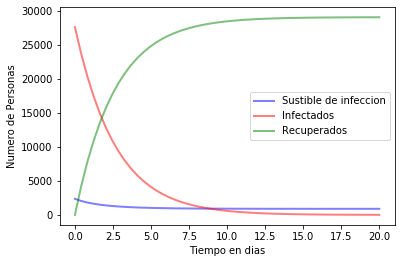

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
N = poblacion
I0 = i0
R0 = r0
S0 = N - I0 - R0
beta= 0.3999999999999875
gamma = 0.4
t = np.linspace(0, 20, 50)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
legend = ax.legend()
print(beta)
print(gamma)


## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [5]:
# Implementar
# Funciones
def incidencia(nuevos,riesgo,n):
    return (nuevos/riesgo)*pow(10,n)
def prevalencia(casos,poblacion,n):
    return (casos/poblacion)*pow(10,n)
def relacion(incidencia,tiempo):
    return incidencia*tiempo
# datos
inci=incidencia(6212,25347,2)
prev=prevalencia(27632,14483499,3)
rela=relacion(inci,28)

print('Tasa de Incidencia --->',inci)
print('Tasa de Prevalencia ---> ',prev)
print('Relación ---> ',rela)

Tasa de Incidencia ---> 24.5078313015347
Tasa de Prevalencia --->  1.9078262787189753
Relación --->  686.2192764429716


## Analisis
En cuanto al modelo epidémico de SIR este nos muestra como la enfermedad en este caso en base a nuestro archivo de datos esta avanzando, este mismo toma en cuenta tres variantes que son los susceptibles, infectados y recuperados.

## Conclusiones
Aunque el modelo SIR puede resultar complejo, este nos ha demostrado que es capaz de capturar muchas de las características típicas de los brotes epidémicos mediante la tasa de infección y el período infeccioso promedio, además este modelo supone que dodos los individuos sin excepción tiene la misma probabilidad de contagiarse del virus en cuestión. Por lo cual debemos entender que a pesar de las medidas tomadas en nuestro país el riesgo siempre existirá 

## Opinion
En cuanto al código no puedo asegurar que eso sea correcto ya que implementar este modelo fue complejo y cabe decir que con los datos no existe una certeza de que sean siempre ciertos o tomados de manera correcto, pero el cuento al modelo este si me parece una buena implementación que deja a la vista el crecimiento que el virus puede tener conforme pasa el tiempo y el mismo riesgo que todos sufrimos en este caso.


# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2